In [1]:
import matplotlib.font_manager as font_manager
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
from functions import get_exterior_coords

fontsize = 20
figsize = (15, 10)
font = 'Times New Roman'

resultpath = 'results/'
network_polygon = '../../data/network/QGIS_Project/referentiel-comptages-edit.shp'

cycleways = gpd.read_file('../../data/cycleways_2000-2022.geojson')
plan_velo_2026 = gpd.read_file('../../data/plan-velo-2026.geojson')
cycleways_2010_2023 = cycleways[cycleways['date_de_livraison'] >= "2010-01-01"]
paris_districts = gpd.read_file('../../data/districts_paris.geojson')
polygon_all_districts = paris_districts.unary_union

def get_cycleways_for_district(x_coords, y_coords, df):
    district_polygon = Polygon(zip(x_coords, y_coords))

    # Create a GeoDataFrame containing the district polygon
    district_gdf = gpd.GeoDataFrame(geometry=[district_polygon], crs=df.crs)

    # Use the GeoDataFrame's cx attribute to spatially filter cycleways_2010_2022
    return gpd.overlay(df, district_gdf, how='intersection')

In [2]:
x_district_1_4, y_district_1_4  = get_exterior_coords(paris_districts, 1, 4)
x_district_5_7, y_district_5_7  = get_exterior_coords(paris_districts, 5, 7)

In [3]:
cycleways_red = cycleways[cycleways['typologie_simple'] == 'Pistes cyclables']

## Abstract


The goal of the noteook is to find the changes in bike kilometres for 2010 - 2023. Find it for both OSM and for the official cyclepaths created.

1. Official cycleways (dataframe: cycleways 2000 - 2022): Check changes 2010 - 2022 for red cyclepaths
2. Official cyclepaths: Check length of Plan Velo II (2026)
3. OSM: Check development of bike paths 2010 - 2022 -> ist vermutlich sehr fehlerbehaftet, daher das nicht direkt wahrnehmen.

Geometry is null for 2 values until 2009.. das kann aber nicht den großen Unterschied machen. Wir vertrauen jetzt einfach mal der Angabe in "length" und "length in km" in the dataset.  

In [4]:
cycleways_until_2009 = cycleways[(cycleways['date_de_livraison'] < "2010-01-01") | (cycleways['date_de_livraison'].isnull())]
cycleways_2010_2023 = cycleways[(cycleways['date_de_livraison'] >= "2010-01-01") & (cycleways['date_de_livraison'] < "2024-01-01")]

# cycleways_2010_2022 = cycleways_2010_2023[cycleways_2010_2023['date_de_livraison'] >= "2010-01-01"]
# cycleways_red_2010_2022 = cycleways_2010_2022[cycleways_2010_2022['typologie_simple'] == 'Pistes cyclables']

In [5]:
dict_cycleways = {"All": cycleways, "Until 2009": cycleways_until_2009, "2010-2023": cycleways_2010_2023}

for description, cycleway_df in dict_cycleways.items():
    print(" ")
    print(description)
    length = round(cycleway_df['longueur_du_troncon_en_km'].sum(), 2)
    print("Network length: " + str(length) + " km")
    
    cycleways_zone_1 = get_cycleways_for_district(x_district_1_4, y_district_1_4, cycleway_df)
    cycleways_zone_2 = get_cycleways_for_district(x_district_5_7, y_district_5_7, cycleway_df)
    
    length_zone_1 = round(cycleways_zone_1['longueur_du_troncon_en_km'].sum(), 2)
    length_zone_2 = round(cycleways_zone_2['longueur_du_troncon_en_km'].sum(), 2)
    
    print("Zone 1 length: " + str(length_zone_1) + " km")
    print("Zone 2 length: " + str(length_zone_2) + " km")
        
    all_cycleways_red = cycleway_df[cycleway_df['typologie_simple'] == 'Pistes cyclables']
    cycleways_zone_1_red = cycleways_zone_1[cycleways_zone_1['typologie_simple'] == 'Pistes cyclables']
    cycleways_zone_2_red = cycleways_zone_2[cycleways_zone_2['typologie_simple'] == 'Pistes cyclables']
    
    print("Paris length (red): " + str(round(all_cycleways_red['longueur_du_troncon_en_km'].sum(), 2)) + " km")
    print("Zone 1 length (red): " + str(round(cycleways_zone_1_red['longueur_du_troncon_en_km'].sum(), 2)) + " km")
    print("Zone 2 length (red): " + str(round(cycleways_zone_2_red['longueur_du_troncon_en_km'].sum(), 2)) + " km")


 
All
Network length: 1083.09 km
Zone 1 length: 115.12 km
Zone 2 length: 104.46 km
Paris length (red): 333.99 km
Zone 1 length (red): 19.51 km
Zone 2 length (red): 16.22 km
 
Until 2009
Network length: 422.25 km
Zone 1 length: 44.37 km
Zone 2 length: 30.23 km
Paris length (red): 170.42 km
Zone 1 length (red): 4.1 km
Zone 2 length (red): 1.78 km
 
2010-2023
Network length: 660.84 km
Zone 1 length: 70.76 km
Zone 2 length: 74.23 km
Paris length (red): 163.57 km
Zone 1 length (red): 15.41 km
Zone 2 length (red): 14.45 km


Changes absolute:

256.50 \%
259.45 \%
345.55 \%
475.85 \%
911.24 \%

In [6]:
print(len(cycleways_until_2009))
print(len(cycleways_2010_2023))
print(len(cycleways))

5779
6480
12259


In [8]:
def get_cycleways_for_district(x_coords, y_coords, df_cycleways):
    district_polygon = Polygon(zip(x_coords, y_coords))

    # Create a GeoDataFrame containing the district polygon
    district_gdf = gpd.GeoDataFrame(geometry=[district_polygon], crs=df_cycleways.crs)

    # Use the GeoDataFrame's cx attribute to spatially filter cycleways_2010_2022
    return gpd.overlay(df_cycleways, district_gdf, how='intersection')

cycleways_zone_1 = get_cycleways_for_district(x_district_1_4, y_district_1_4, cycleways)
cycleways_zone_2 = get_cycleways_for_district(x_district_5_7, y_district_5_7, cycleways)


In [9]:
cycleways_zone_1_red = cycleways_zone_1[cycleways_zone_1['typologie_simple'] == 'Pistes cyclables']
cycleways_zone_2_red = cycleways_zone_2[cycleways_zone_2['typologie_simple'] == 'Pistes cyclables']

In [10]:
print(cycleways_zone_1['length'].sum()/1000)
print(cycleways_zone_2['length'].sum()/1000)

print(cycleways_zone_1_red['length'].sum()/1000)
print(cycleways_zone_2_red['length'].sum()/1000)

115.12305306773
104.4628373968
19.51325145708
16.22254048554


In [12]:
# Get length in section in km
length_all_cycleways = cycleways['longueur_du_troncon_en_km'].sum()
print(length_all_cycleways)

length_all_red_cycleways = cycleways_red['longueur_du_troncon_en_km'].sum()
print(length_all_red_cycleways)

1083.09204407628
333.99113325182


In [13]:
plan_velo_2026['length_in_km'] = plan_velo_2026['geometry'].length*100

length_plan_velo = plan_velo_2026['length_in_km'].sum()
print(length_plan_velo)

446.9888315379619


/var/folders/m_/fjnjc1sn0ggc7z_2y7n27xfh0000gn/T/ipykernel_27249/3283003115.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plan_velo_2026['length_in_km'] = plan_velo_2026['geometry'].length*100


In [14]:
plan_velo_2026_existant = plan_velo_2026[plan_velo_2026['statut'] == "existant"]
plan_velo_2026_arealise = plan_velo_2026[plan_velo_2026['statut'] == "à réaliser"]

print(len(plan_velo_2026_existant))
print(len(plan_velo_2026_arealise))
print(len(plan_velo_2026))

140
183
323


/var/folders/m_/fjnjc1sn0ggc7z_2y7n27xfh0000gn/T/ipykernel_27249/3816199632.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(paris_districts.geometry.centroid.x, paris_districts.geometry.centroid.y, paris_districts.c_ar):


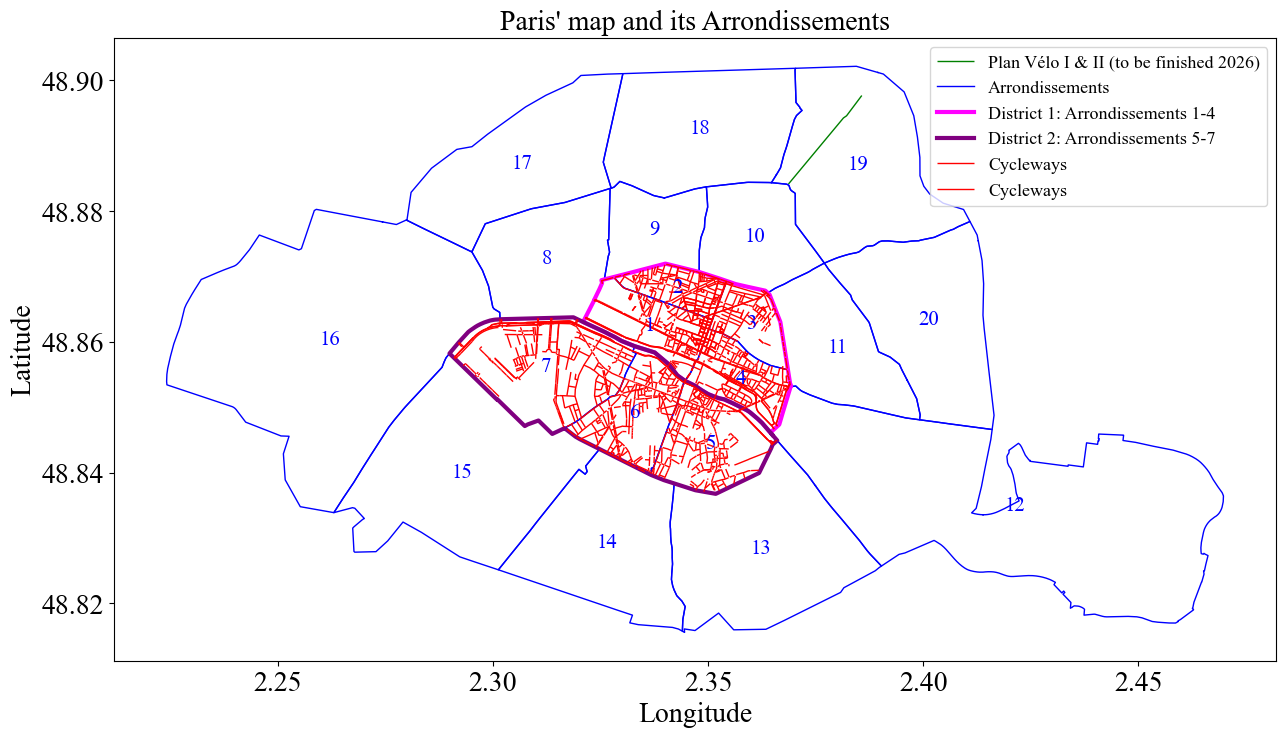

In [15]:
# plot the shapefile, and label the districts with the value in the column "l_ar"
fig, ax = plt.subplots(figsize=figsize)
ax.set_title('Paris\' map and its Arrondissements', font = font, fontsize = fontsize)

# df_osm_bike.plot(ax = ax, color = "grey", linewidth = 0.2, label = 'Network')

# paris_districts.plot(column='c_ar', ax=ax, legend=False, alpha = 0.1, edgecolor='black', linewidth = 5)
# df_osm.plot(ax = ax, color = "grey", linewidth = 0.2, label = "Road network")
# ax.plot(x_coords, y_coords, color='grey', linewidth=3, label='Study area')
# plan_velo_2026.plot(ax = ax, color = "green", linewidth = 1, label = "Plan Vélo I & II (to be finished 2026)")

first_row = plan_velo_2026.head(1)

# Plot the first row
first_row.plot(ax=ax, color = "green", linewidth = 1, label = "Plan Vélo I & II (to be finished 2026)")

# cycleways_red.plot(ax = ax, color = "red", linewidth = 1, label = "Cycleways")

for idx, row in paris_districts.iterrows():
    # Plot each polygon
    x, y = row['geometry'].exterior.xy
    # plt.plot(x, y, color = "blue", linewidth = 1)
    if idx == 0:
        plt.plot(x, y, color = "blue", linewidth = 1, label = 'Arrondissements')
    else: 
        plt.plot(x, y, color = "blue", linewidth = 1)

plt.plot(x_district_1_4, y_district_1_4, color = 'magenta', linewidth = 3, label = 'District 1: Arrondissements 1-4')
plt.plot(x_district_5_7, y_district_5_7, color = 'purple', linewidth = 3, label = 'District 2: Arrondissements 5-7')
cycleways_zone_2.plot(ax = ax, color = "red", linewidth = 1, label = "Cycleways")
cycleways_zone_1.plot(ax = ax, color = "red", linewidth = 1, label = "Cycleways")

for x, y, label in zip(paris_districts.geometry.centroid.x, paris_districts.geometry.centroid.y, paris_districts.c_ar):
    ax.text(x, y, label, color = 'blue', fontsize=15, font = font, ha='center', va='center') 
plt.xticks(font = font, fontsize = fontsize)
plt.yticks(font = font, fontsize = fontsize)
plt.xlabel("Longitude", font = font, fontsize = fontsize)
plt.ylabel("Latitude", font = font, fontsize = fontsize)
font_legend = font_manager.FontProperties(family=font, style='normal', size=13)
plt.legend(loc='upper right', prop = font_legend)